# **Exploratory Data Analysis**

## Here we will be performing Descriptor Calculation and Exploratory Data Analysis

### We will be using conda and rdkit

In [2]:
# ! wget https://repo.anaconda.com/miniconda/Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
# ! chmod +x Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
# ! bash ./Miniconda3-py310_23.3.1-0-Linux-x86_64.sh -b -f -p /usr/local
# ! conda install -c rdkit rdkit -y
# import sys
# sys.path.append('usr/local/lib/python3.10/site-packages/')

In [3]:
# !pip install rdkit deepchem

In [4]:
# ! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
# ! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
# ! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
# ! conda install -c rdkit rdkit -y
# import sys
# sys.path.append('usr/local/lib/python3.7/site-packages/')

**The following section is a bugfix for rdkit not found**

In [5]:
!pip install rdkit-pypi

     ---------------------------------------- 20.5/20.5 MB 1.7 MB/s eta 0:00:00


In [6]:
!cat /etc/lsb-release

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
import sys
print(sys.path)

['C:\\Users\\Alex\\Desktop\\GitHub\\Bioinformatics_Project', 'D:\\anaconda3\\python39.zip', 'D:\\anaconda3\\DLLs', 'D:\\anaconda3\\lib', 'D:\\anaconda3', '', 'C:\\Users\\Alex\\AppData\\Roaming\\Python\\Python39\\site-packages', 'D:\\anaconda3\\lib\\site-packages', 'D:\\anaconda3\\lib\\site-packages\\win32', 'D:\\anaconda3\\lib\\site-packages\\win32\\lib', 'D:\\anaconda3\\lib\\site-packages\\Pythonwin']


In [8]:
import rdkit
from rdkit import Chem
from IPython import display
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
import pandas

In [9]:
mol = Chem.MolFromSmiles('c1ccccc1C(=O)O')

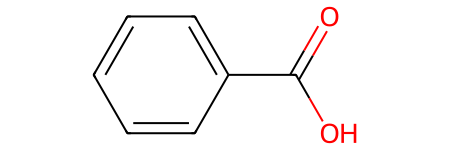

In [10]:
mol

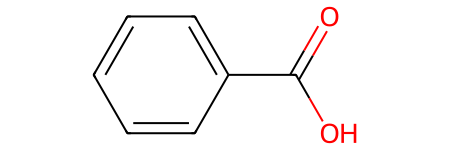

In [11]:
display(mol)

**Bugfix Section end**

## **Load bioactivity data**

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('bioactivity_preprocessed_schisto_data.csv')

**Lipinski**

Set of rules for evaluating the druglikeness of compounds. This is based on the Absorbtion, Distribution, Metabolism and Excretion(ADME). This is also known as pharmacokinetic profile.

Lipinski's Rule:
- Molecular weight < 500 Dalton
- Octanol-water partition coefficient(LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

### Import libraries ###

In [14]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### Calculate descriptors

In [15]:
# Inspired by : https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):
    
    moldata = []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
        
    baseData = np.arange(1,1)
    i=0
    for mol in moldata:
        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        
        row = np.array([desc_MolWt,
                       desc_MolLogP,
                       desc_NumHDonors,
                       desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
        
    columnNames = ["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)
    
    return descriptors

In [16]:
df_lipinski = lipinski(df.canonical_smiles)

### Combine DataFrames

Lets take a look at the 2 DataFrames that will be combined.

In [18]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,122.127,0.18050,1.0,2.0
1,122.127,0.18050,1.0,2.0
2,338.444,3.46230,1.0,5.0
3,339.826,4.58370,1.0,2.0
4,422.504,4.59722,1.0,5.0
5,417.473,3.58250,2.0,9.0
6,431.500,3.97260,2.0,9.0
7,445.527,4.21860,2.0,9.0
8,479.544,4.61090,2.0,9.0
9,417.473,3.58250,2.0,9.0


In [19]:
df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL1140,NC(=O)c1cccnc1,23100.0
1,CHEMBL1140,NC(=O)c1cccnc1,420000.0
2,CHEMBL252556,COC1=C(OC)C(=O)C(CCCCCCCCCCO)=C(C)C1=O,1900.0
3,CHEMBL3430999,O=C(c1cc2cc(Cl)ccc2[nH]1)N1CCCCC1c1cccnc1,18200.0
4,CHEMBL3431191,CC(=O)Nc1ccc(-c2noc(CC3CCCN(Cc4cccc(F)c4C)C3)n...,14000.0
5,CHEMBL3431127,COc1ccc(Oc2ccc(C(C)N(C)c3ncc4c(N)nc(N)nc4n3)cc...,23700.0
6,CHEMBL4459211,CCC(c1ccc(Oc2ccc(OC)cc2)cc1)N(C)c1ncc2c(N)nc(N...,12800.0
7,CHEMBL4571708,COc1ccc(Oc2ccc(C(C(C)C)N(C)c3ncc4c(N)nc(N)nc4n...,27700.0
8,CHEMBL4442390,COc1ccc(Oc2ccc(C(c3ccccc3)N(C)c3ncc4c(N)nc(N)n...,2340.0
9,CHEMBL4529336,COc1cccc(Oc2ccc(C(C)N(C)c3ncc4c(N)nc(N)nc4n3)c...,23100.0
